The is a cursory visualisation.
The goals are:

1. To increase the numbers of SHSHAT registration
2. To increase the number of offers received

for historically under-represented groups such that more diversity is achieved.

The data used are:

* The 2016 School Explorer provided by PASSNYC
* The 2017-2018 SHSAT Admissions Test Offers By Schools as collated by Infocusp (https://www.kaggle.com/infocusp/2017-2018-shsat-admissions-test-offers-by-schools)
* The 2013-2015 New York state mathematics exam results from Socrata’s NYC Open Datasets (https://www.kaggle.com/new-york-city/new-york-state-math-test-results)
* The 2010-2016 School Safety report from from Socrata’s NYC Open Datasets (https://www.kaggle.com/new-york-city/ny-2010-2016-school-safety-report)

In [1]:
import numpy as np 
import pandas as pd 


from IPython.display import display, HTML
import matplotlib.pyplot as plt
import math
import csv
import os
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sb
import plotly.figure_factory as FF
import folium
from folium import plugins
from io import StringIO


# Importing data
schl_df = pd.read_csv('./data/2016 School Explorer.csv')
reg_df = pd.read_csv('./data/D5 SHSAT Registrations and Testers.csv')
offer_df =  pd.read_csv('./data/2017-2018 SHSAT Admissions Test Offers By Sending School.csv')
math_df =  pd.read_csv('./data/2013-2015-new-york-state-mathematics-exam.csv')
safe_df =  pd.read_csv('./data/2010-2016-school-safety-report.csv')


offer_df.rename(columns = {'School DBN':'Location Code'}, inplace = True)
del offer_df['School Name']
offer_df.set_index('Location Code', inplace=True)
schl_df.set_index('Location Code', inplace=True)

df = pd.concat([schl_df, offer_df], axis=1, join='outer')
df["School Income Estimate"] = df["School Income Estimate"].replace('[\$,]', '', regex=True).astype(float)
df["Percent of eight grade students who received offer"] = df["Percent of eight grade students who received offer"].replace('[\%,]', '', regex=True).astype(float)
df["Collaborative Teachers %"] = df["Collaborative Teachers %"].replace('[\%,]', '', regex=True).astype(float)
df["Supportive Environment %"] = df["Supportive Environment %"].replace('[\%,]', '', regex=True).astype(float)
df["Effective School Leadership %"] = df["Effective School Leadership %"].replace('[\%,]', '', regex=True).astype(float)
df["Strong Family-Community Ties %"] = df["Strong Family-Community Ties %"].replace('[\%,]', '', regex=True).astype(float)
df["Trust %"] = df["Trust %"].replace('[\%,]', '', regex=True).astype(float)
df["Percent Black / Hispanic"] = df["Percent Black / Hispanic"].replace('[\%,]', '', regex=True).astype(float)
df["Percent Asian"] = df["Percent Asian"].replace('[\%,]', '', regex=True).astype(float)
df["Percent White"] = df["Percent White"].replace('[\%,]', '', regex=True).astype(float)
df["Percentage of Black/Hispanic students"] = df["Percentage of Black/Hispanic students"].replace('[\%,]', '', regex=True).astype(float)
df["Student Attendance Rate"] = df["Student Attendance Rate"].replace('[\%,]', '', regex=True).astype(float)
df.shape
# Any results you write to the current directory are saved as output.

(1281, 166)

In [2]:
excluded = df[df['City'].isnull()]
excluded.shape
# 9 schools are not in the PASSNYC School Explorer

(9, 166)

In [3]:
DF = df.dropna(subset=['City'])
DF.shape
DF.head(10)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,District,Latitude,Longitude,Address (Full),City,...,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Borough,School Category,Number of students who took test,Number of students who received offer,Percent of eight grade students who received offer,Percentage of Black/Hispanic students
01M015,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,3.101000e+11,1.0,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01M019,NaN,NaN,NaN,P.S. 019 ASHER LEVY,3.101000e+11,1.0,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01M020,NaN,NaN,NaN,P.S. 020 ANNA SILVER,3.101000e+11,1.0,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01M034,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,3.101000e+11,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,...,0.0,0.0,0.0,0.0,Manhattan,Public School 34,6.0,NaN,NaN,93.0
01M063,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,3.101000e+11,1.0,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01M064,NaN,NaN,NaN,P.S. 064 ROBERT SIMON,3.101000e+11,1.0,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01M110,NaN,NaN,NaN,P.S. 110 FLORENCE NIGHTINGALE,3.101000e+11,1.0,40.715293,-73.979927,"285 DELANCEY ST NEW YORK, NY 10002",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01M134,NaN,NaN,NaN,P.S. 134 HENRIETTA SZOLD,3.101000e+11,1.0,40.714301,-73.982966,"293 E BROADWAY NEW YORK, NY 10002",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01M140,NaN,NaN,NaN,P.S. 140 NATHAN STRAUS,3.101000e+11,1.0,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,...,0.0,0.0,0.0,1.0,Manhattan,Public School 140,6.0,NaN,NaN,91.0
01M142,NaN,NaN,NaN,P.S. 142 AMALIA CASTRO,3.101000e+11,1.0,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",NEW YORK,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schl = DF.dropna(subset=['Number of students who took test'])
gd_schl = schl.dropna(subset=['Number of students who received offer'])
ok_schl = schl[schl['Number of students who received offer'].isnull()]

tmp = DF[DF['Number of students who took test'].isnull()]
wk_schl = tmp.loc[tmp['Grade High'] == '08']
others = tmp.loc[tmp['Grade High'] != '08']

print("schls with at least 1 reg but 0 offer df \n",ok_schl.shape,"\n","schls with at least 1 offer df \n",gd_schl.shape,"\n","schls with 0 reg df \n",wk_schl.shape,"\n","schls with no 8th grade df \n",others.shape)

best = gd_schl.loc[gd_schl['Percent of eight grade students who received offer'] >= 50]


tmp = gd_schl.loc[gd_schl['Percent of eight grade students who received offer'] >= 20]
avgbest = tmp.loc[tmp['Percent of eight grade students who received offer'] < 50]
tmp = gd_schl.loc[gd_schl['Number of students who received offer'] <= 99]


tmp = gd_schl.loc[gd_schl['Percent of eight grade students who received offer'] >= 10]
lowbest = tmp.loc[tmp['Percent of eight grade students who received offer'] < 20]
shitbest = gd_schl.loc[gd_schl['Percent of eight grade students who received offer'] < 10]


schls with at least 1 reg but 0 offer df 
 (416, 166) 
 schls with at least 1 offer df 
 (120, 166) 
 schls with 0 reg df 
 (60, 166) 
 schls with no 8th grade df 
 (676, 166)


**Data Impression**

We will be merging the School Explorer provided by PASSNYC and the 2017-2018 SHSAT Admission Test Offers data together. 

This gives us 4 groups of schools:
1.  Schools which do not offer 8th grade and therefore is unable to send any students to SHSAT
2. Schools which offer 8th grade but have 0 SHSAT takers.
3. Schools which have SHSAT takers but has 0 students who managed to get an offer.
4. Schools with students who manged to clinch an offer.

For the majority of this visualisation, we will be concerning ourselves with the last 3 groups since our goal is to increase registration rate and student offers.

In [5]:
labels = ['Does not offer 8th Grade','Schls with 0 takers','Schls with takers but 0 offers','Schls with offers']
values = [676,60,416,120]


# figure
fig = {
  "data": [
    {
      "values": values,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "hoverinfo":"label+percent",
      "textinfo":'value',
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Type of Schools in Dataset",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "Number of Schools",
                "x": 0.14,
                "y": 1
            },
        ]
    }
}
iplot(fig)

**Comparing Economic Need Index and School Income between the different kind of schools**

We will  be using ENI instead of School Income for most of the visualisations because only 226 out of the 596 schools have valid School Income data, whereas 591 out of the 596 schools have valid ENI data.

In [6]:
IEgs = gd_schl.dropna(subset=['School Income Estimate'])
IEos = ok_schl.dropna(subset=['School Income Estimate'])
IEws = wk_schl.dropna(subset=['School Income Estimate'])
print("Income estimate dfs",IEgs.shape,IEos.shape,IEws.shape)
ENIgs = gd_schl.dropna(subset=['Economic Need Index'])
ENIos = ok_schl.dropna(subset=['Economic Need Index'])
ENIws = wk_schl.dropna(subset=['Economic Need Index'])
print("ENI dfs",ENIgs.shape,ENIos.shape,ENIws.shape)

Income estimate dfs (33, 166) (158, 166) (35, 166)
ENI dfs (118, 166) (413, 166) (60, 166)


In [7]:

trace0 = go.Box(x=IEgs["School Income Estimate"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=IEos["School Income Estimate"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=IEws["School Income Estimate"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of School Income",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [8]:

trace0 = go.Box(x=gd_schl["Economic Need Index"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Economic Need Index"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Economic Need Index"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Economic Need Index of schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

As visualised, schools without any students taking SHSAT have the lowest average Estimated School Income and the highest average ENI, whereas schools where students successfuly managed to procure offers have the highest average  Estimated School Income and the lowest average ENI.

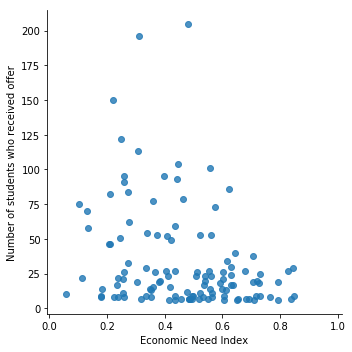

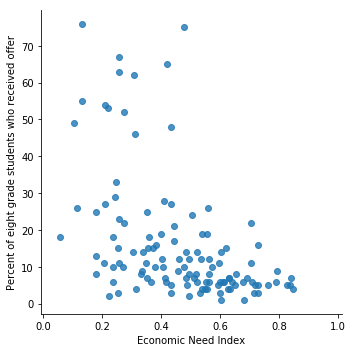

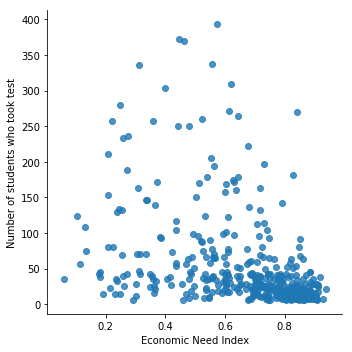

In [9]:
sb.lmplot(x='Economic Need Index', y='Number of students who received offer', data=DF,
           fit_reg=False)

sb.lmplot(x='Economic Need Index', y='Percent of eight grade students who received offer', data=DF,
           fit_reg=False)
Eschl = DF.loc[DF['Grade High'] == '08']
sb.lmplot(x='Economic Need Index', y='Number of students who took test', data=Eschl,
           fit_reg=False)

As visualized by the top 2 scatter plots, most schools with a high percentage/number of students procuring offers have an ENI of 0.6 or below.  While there is no such clear cutoff for the last scatter plot, the huge concentration of schools on the bottom right of the graph indidcates that a sizeable number of the schools with high ENI also have very low numbers of SHSAT takers.

**Race Distribution**

While it is commonly lamented that black and hispanic students are underrepresented (for example in this article by the new york times https://www.nytimes.com/2015/03/06/nyregion/lack-of-diversity-persists-in-admissions-to-selective-new-york-city-high-schools.html), let us examine the data we have to see if this view can be  verified for our particular instance.

Text(0,0.5,'Frequency')

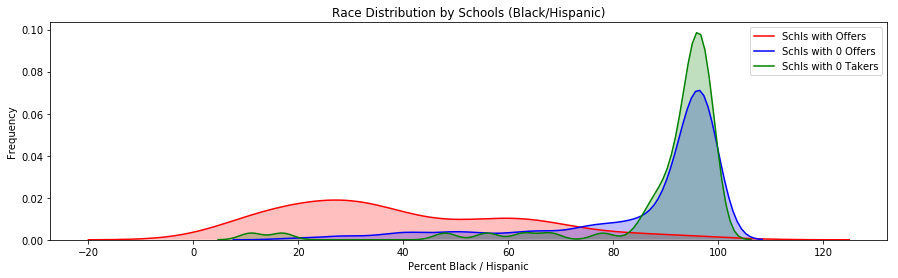

In [10]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Percent Black / Hispanic"] , color='r',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Percent Black / Hispanic"] , color='b',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Percent Black / Hispanic"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Race Distribution by Schools (Black/Hispanic)')
plt.xlabel('Percent Black / Hispanic')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

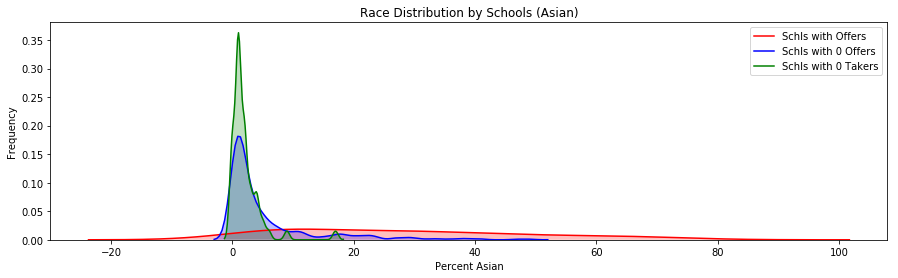

In [11]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Percent Asian"] , color='r',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Percent Asian"] , color='b',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Percent Asian"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Race Distribution by Schools (Asian)')
plt.xlabel('Percent Asian')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

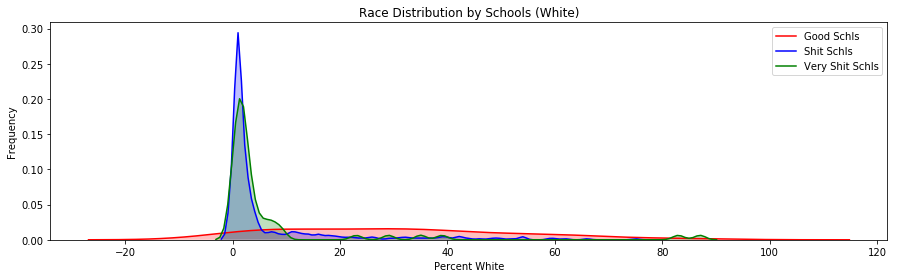

In [12]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Percent White"] , color='r',shade=True, label='Good Schls')
ax=sb.kdeplot(ok_schl["Percent White"] , color='b',shade=True, label='Shit Schls')
ax=sb.kdeplot(wk_schl["Percent White"] , color='g',shade=True, label='Very Shit Schls')
plt.title('Race Distribution by Schools (White)')
plt.xlabel('Percent White')
plt.ylabel('Frequency')

From the above visualisation, we can clearly see that the majority of schools with no SHSAT takers and SHSAT offers have very high percentages of black/hispanic students (as can be seen by the bulge near the 100% mark in the first visual) while having very low percentages of Asian/White students (as characterised by the sharp spike around zero in the 2nd and 3rd visual). We are however, unable to get a good read on the distribution of race for schools with SHSAT offers due to the lack of significant spikes.

In [13]:
trace0 = go.Box(x=gd_schl["Percent Asian"],name="Asian",boxmean=True)
trace1 = go.Box(x=gd_schl["Percent White"],name="White",boxmean=True)
trace2 = go.Box(x=gd_schl["Percent Black / Hispanic"],name="Black/Hispanic",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of race in good schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

Further investigation leads us to find that as on average, schools with sucessful SHSAT takers still have around 38.94% of black and hispanic students, with almost equal percentages of White (30.35%) and Asian (28.4%) students. Hence, while these schools do have a much higher percentage of white and asian students compared to schools with 0 SHSAT takers and/or offers, they still have a slight majority of black/hispanic students. 

However, before we jump to any conclusions, let us dig just a little bit deeper by breaking down the schools receiving SHSAT offers into 4 sub-groups based on the percentage of students receiving offers.

In [14]:
trace0 = go.Box(x=best["Percent Black / Hispanic"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Percent Black / Hispanic"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Percent Black / Hispanic"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Percent Black / Hispanic"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Percent Black / Hispanic of Schools with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [15]:
trace0 = go.Box(x=best["Percent White"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Percent White"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Percent White"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Percent White"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Percent White of Schools with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [16]:
trace0 = go.Box(x=best["Percent Asian"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Percent Asian"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Percent Asian"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Percent Asian"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Percent Asian of Schools with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

From the first 2 visuals we can clearly see that as the percentage of successful offers received by the school increases, the average percentage of Black/Hispanic student decreases while the average percentage of White students increases. This trend is also partially applicable to Asian students, except that there is no significant increase (a slight decrease infact) between schools where more than 50% of their students succesfully attained an offer and schools where 20~49% of their students obtained offers.

In summary, schools with 0 SHSAT takers and/or offers tend to have very high (>90%) percentage of black and hispanic students, whereas the top schools where over 50% of their students managed to clinch an offer have an average of a measly 15.1% of black/hispanic students. This is placed in stark contrast against the high percentage of White/Asian students within these same top feeder schools.

**Visualisation by Location**
For each of the 3 kinds of schools, we further sub divide them according to their location. 

This essentially breaks them into 6 boroughs:

1.Manhattan

2.Brooklyn

3.Bronx

4.Queens

5.Staten Island

6.Long Island City


In [17]:
gdMschl = gd_schl.loc[gd_schl["Borough"]=='Manhattan'] 
gdBkschl = gd_schl.loc[gd_schl["Borough"]=='Brooklyn']
gdBxschl = gd_schl.loc[gd_schl["Borough"]=='Bronx']
gdQschl = gd_schl.loc[gd_schl["Borough"]=='Queens']
gdSschl = gd_schl.loc[gd_schl["Borough"]=='Staten Island']
gdLschl = gd_schl.loc[gd_schl["Borough"]=='LONG ISLAND CITY']

Mschl = schl.loc[schl['Borough'] == 'Manhattan']
Bschl = schl.loc[schl['Borough'] == 'Brooklyn']
BXschl = schl.loc[schl['Borough'] == 'Bronx']
Qschl = schl.loc[schl['Borough'] == 'Queens']
Sschl = schl.loc[schl['Borough'] == 'Staten Island']
Lschl = schl.loc[schl['Borough'] == 'LONG ISLAND CITY']

Mwk_schl = wk_schl.loc[wk_schl['Borough'] == 'Manhattan']
Bwk_schl = wk_schl.loc[wk_schl['Borough'] == 'Brooklyn']
BXwk_schl = wk_schl.loc[wk_schl['Borough'] == 'Bronx']
Qwk_schl = wk_schl.loc[wk_schl['Borough'] == 'Queens']
Swk_schl = wk_schl.loc[wk_schl['Borough'] == 'Staten Island']
Lwk_schl = wk_schl.loc[wk_schl['Borough'] == 'LONG ISLAND CITY']

**Visualisation of Schools with reference to Percentage of 8th Graders obtaining Offer**

In [18]:
lat_0=40.7127
lon_0=-74.0059

maps = folium.Map([lat_0,lon_0], zoom_start=10.0,tiles='stamentoner')
for lat, long, cnt in zip(gdMschl['Latitude'], gdMschl['Longitude'], gdMschl['Percent of eight grade students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="gold", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdBkschl['Latitude'], gdBkschl['Longitude'], gdBkschl['Percent of eight grade students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="green", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdBxschl['Latitude'], gdBxschl['Longitude'], gdBxschl['Percent of eight grade students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="red", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdQschl['Latitude'], gdQschl['Longitude'], gdQschl['Percent of eight grade students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="purple", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdSschl['Latitude'], gdSschl['Longitude'], gdSschl['Percent of eight grade students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="blue", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdLschl['Latitude'], gdLschl['Longitude'], gdLschl['Percent of eight grade students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="pink", fill=True, fill_opacity=0.5).add_to(maps)
    
maps

**Legend**

Gold -- Mahattan

Green -- Brooklyn

Red -- Bronx

Purple -- Queens

Blue -- Stanten Island

Pink -- Long Island City

** Visualisation of Schools with reference to Number of 8th Graders obtaining Offer**

In [19]:
lat_0=40.7127
lon_0=-74.0059

maps = folium.Map([lat_0,lon_0], zoom_start=10.0,tiles='stamentoner')
for lat, long, cnt in zip(gdMschl['Latitude'], gdMschl['Longitude'], gdMschl['Number of students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="gold", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdBkschl['Latitude'], gdBkschl['Longitude'], gdBkschl['Number of students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="green", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdBxschl['Latitude'], gdBxschl['Longitude'], gdBxschl['Number of students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="red", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdQschl['Latitude'], gdQschl['Longitude'], gdQschl['Number of students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="purple", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdSschl['Latitude'], gdSschl['Longitude'], gdSschl['Number of students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="blue", fill=True, fill_opacity=0.5).add_to(maps)
    
for lat, long, cnt in zip(gdLschl['Latitude'], gdLschl['Longitude'], gdLschl['Number of students who received offer']):
    folium.Circle([lat, long],radius=cnt*20, color="pink", fill=True, fill_opacity=0.5).add_to(maps)
    
maps

**Legend**

Gold -- Mahattan

Green -- Brooklyn

Red -- Bronx

Purple -- Queens

Blue -- Stanten Island

Pink -- Long Island City

** Visualisation of Schools with reference to Number of 8th Graders Taking SHSAT**

In [20]:
lat_0=40.7127
lon_0=-74.0059

maps = folium.Map([lat_0,lon_0], zoom_start=10.0,tiles='stamentoner')
for lat, long, cnt in zip(Mschl['Latitude'], Mschl['Longitude'], Mschl['Number of students who took test']):
    folium.Circle([lat, long],radius=cnt*5, color="gold", fill=True, fill_opacity=0.5).add_to(maps)

for lat, long, cnt in zip(Bschl['Latitude'], Bschl['Longitude'], Bschl['Number of students who took test']):
    folium.Circle([lat, long],radius=cnt*5, color="green", fill=True, fill_opacity=0.5).add_to(maps)

for lat, long, cnt in zip(BXschl['Latitude'], BXschl['Longitude'], BXschl['Number of students who took test']):
    folium.Circle([lat, long],radius=cnt*5, color="red", fill=True, fill_opacity=0.5).add_to(maps)

for lat, long, cnt in zip(Qschl['Latitude'], Qschl['Longitude'], Qschl['Number of students who took test']):
    folium.Circle([lat, long],radius=cnt*5, color="purple", fill=True, fill_opacity=0.5).add_to(maps)

for lat, long, cnt in zip(Sschl['Latitude'], Sschl['Longitude'], Sschl['Number of students who took test']):
    folium.Circle([lat, long],radius=cnt*5, color="blue", fill=True, fill_opacity=0.5).add_to(maps)

for lat, long, cnt in zip(Lschl['Latitude'], Lschl['Longitude'], Lschl['Number of students who took test']):
    folium.Circle([lat, long],radius=cnt*5, color="pink", fill=True, fill_opacity=0.5).add_to(maps)
maps

**Legend**

Gold -- Mahattan

Green -- Brooklyn

Red -- Bronx

Purple -- Queens

Blue -- Stanten Island

Pink -- Long Island City

As visualised, Bronx (red) seemed to be the worst performing area with scarce concentration of neither high percentage nor actual number of students successfully acquiring an offer despite the fact that it does have its share of test takers. Mahattan (gold) and the surronding area, together with east Brooklyn (green) appears to be the best performing locations in terms of both percentage and actual numbers, while Queens (purple) is actually doing quite well if we were to look at the raw number of succesful SHSAT takers rather than the percentage. Long Island City schools are not visible because there is only 1 school in the dataset belonging to that borough.

In [21]:
print("DF of schls in Long Island City", gdLschl.shape,Lschl.shape,Lwk_schl.shape)

DF of schls in Long Island City (0, 166) (1, 166) (0, 166)


** Visualisation of Schools with 0 SHSAT takers**

In [22]:
lat_0=40.7127
lon_0=-74.0059

maps = folium.Map([lat_0,lon_0], zoom_start=10.5,tiles='stamentoner')
for lat, long in zip(Mwk_schl['Latitude'], Mwk_schl['Longitude'], ):
    folium.Circle([lat, long],radius=300, color="gold", fill=True, fill_opacity=0.9).add_to(maps)
for lat, long in zip(Bwk_schl['Latitude'], Bwk_schl['Longitude'], ):
    folium.Circle([lat, long],radius=300, color="green", fill=True, fill_opacity=0.9).add_to(maps)
for lat, long in zip(BXwk_schl['Latitude'], BXwk_schl['Longitude'], ):
    folium.Circle([lat, long],radius=300, color="red", fill=True, fill_opacity=0.9).add_to(maps)
for lat, long in zip(Qwk_schl['Latitude'], Qwk_schl['Longitude'], ):
    folium.Circle([lat, long],radius=300, color="purple", fill=True, fill_opacity=0.9).add_to(maps)
for lat, long in zip(Swk_schl['Latitude'], Swk_schl['Longitude'], ):
    folium.Circle([lat, long],radius=300, color="blue", fill=True, fill_opacity=0.9).add_to(maps)
for lat, long in zip(Lwk_schl['Latitude'], Lwk_schl['Longitude'], ):
    folium.Circle([lat, long],radius=300, color="pink", fill=True, fill_opacity=0.9).add_to(maps)
    
maps

**Legend**

Gold -- Mahattan

Green -- Brooklyn

Red -- Bronx

Purple -- Queens

Blue -- Stanten Island

Pink -- Long Island City

It is interesting to note that a considerable number of schools with 0 SHSAT takers are concentrated in Bronx or borders Bronx.

**Crime by Borough**

Now we will use the data from the NY2010-2016 School Safety report to see if there is any correlation between safety and the performance of schools in that area. Unfortunately, this data does not contain stats of Statan Island or Long Island City.

In [23]:
tmp = safe_df.dropna(subset=['AvgOfVio N'])
tmp = tmp.dropna(subset=['Latitude'])
Msafe = tmp.loc[safe_df['Borough Name'] == 'MANHATTAN']
Bsafe = tmp.loc[safe_df['Borough Name'] == 'BROOKLYN ']
BXsafe = tmp.loc[safe_df['Borough'] == 'X']
Qsafe = tmp.loc[safe_df['Borough'] == 'Q']
Ssafe = tmp.loc[safe_df['Borough Name'] == 'STATEN ISLAND']
Lsafe = tmp.loc[safe_df['Borough Name'] == 'LONG ISLAND CITY']
print("df of Staten Island/Long Island City",Ssafe.shape,Lsafe.shape)


df of Staten Island/Long Island City (0, 34) (0, 34)


In [24]:
trace0 = go.Box(x=Msafe["AvgOfVio N"],name="Manhattan",boxmean=True)
trace1 = go.Box(x=Bsafe["AvgOfVio N"],name="Brooklyn",boxmean=True)
trace2 = go.Box(x=BXsafe["AvgOfVio N"],name="Bronx",boxmean=True)
trace3 = go.Box(x=Qsafe["AvgOfVio N"],name="Queens",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Average Violent Crime",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [25]:
trace0 = go.Box(x=Msafe["AvgOfNoCrim N"],name="Manhattan",boxmean=True)
trace1 = go.Box(x=Bsafe["AvgOfNoCrim N"],name="Brooklyn",boxmean=True)
trace2 = go.Box(x=BXsafe["AvgOfNoCrim N"],name="Bronx",boxmean=True)
trace3 = go.Box(x=Qsafe["AvgOfNoCrim N"],name="Queens",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Average Non-criminal Crime",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [26]:
trace0 = go.Box(x=Msafe["AvgOfMajor N"],name="Manhattan",boxmean=True)
trace1 = go.Box(x=Bsafe["AvgOfMajor N"],name="Brooklyn",boxmean=True)
trace2 = go.Box(x=BXsafe["AvgOfMajor N"],name="Bronx",boxmean=True)
trace3 = go.Box(x=Qsafe["AvgOfMajor N"],name="Queens",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Major Crime",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [27]:
trace0 = go.Box(x=Msafe["AvgOfOth N"],name="Manhattan",boxmean=True)
trace1 = go.Box(x=Bsafe["AvgOfOth N"],name="Brooklyn",boxmean=True)
trace2 = go.Box(x=BXsafe["AvgOfOth N"],name="Bronx",boxmean=True)
trace3 = go.Box(x=Qsafe["AvgOfOth N"],name="Queens",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Other Crime",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

As we can see, for all categories of crime the best performing boroughs (Mahattan and Brooklyn) have the least average crime rate compared to the other two. It is interesting to note that Queens, despite performing better than Bronx for both percentage and raw number of successful test takers, actually has the worst crime rate across the board. 

In [28]:
trace0 = go.Box(x=gdQschl["Economic Need Index"],name="Queens Schls",boxmean=True)
trace1 = go.Box(x=gdBxschl["Economic Need Index"],name="Bronx Schls",boxmean=True)

data = [trace0, trace1]
layout = go.Layout(
    title = "Box Plot of Economic Need Index",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

As shown by the above visualisation, it seems like ENI trumps crime rate when it comes to its impact on school performance, as Queens schools outperform Bronx schools despite having an higher average crime rate while having a much lower average ENI.

**Visualization of ELA and Math results**

In [29]:
trace0 = go.Box(x=gd_schl["Average ELA Proficiency"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Average ELA Proficiency"],name="Schls with 0 Offers ",boxmean=True)
trace2 = go.Box(x=wk_schl["Average ELA Proficiency"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Average ELA Proficiency of  schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [30]:
trace0 = go.Box(x=gd_schl["Average Math Proficiency"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Average Math Proficiency"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Average Math Proficiency"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Average Math Proficiency of  schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

It is no surprise to us that schools which perform better in ELA and Math exams also perform better in SHSAT.

Now let us break down the performance by race using the data from the New York State Math Test Results to see if Black/Hispanic students have been under performing before SHSAT so as to better help them. To do this, we are going to compare the Math results of all 4 races (Asian, Black, Hispanic, White) across all 8 grades spanning from 2013 to 2015.

In [31]:
math_2013 = math_df[math_df['Year'] == 2013]
Asian_math_2013 = math_2013[math_2013['Category'] == 'Asian']
Black_math_2013 = math_2013[math_2013['Category'] == 'Black']
White_math_2013 = math_2013[math_2013['Category'] == 'White']
Hispanic_math_2013 = math_2013[math_2013['Category'] == 'Hispanic']

math_2014 = math_df[math_df['Year'] == 2014]
Asian_math_2014 = math_2014[math_2014['Category'] == 'Asian']
Black_math_2014 = math_2014[math_2014['Category'] == 'Black']
White_math_2014 = math_2014[math_2014['Category'] == 'White']
Hispanic_math_2014 = math_2014[math_2014['Category'] == 'Hispanic']

math_2015 = math_df[math_df['Year'] == 2015]
Asian_math_2015 = math_2015[math_2015['Category'] == 'Asian']
Black_math_2015 = math_2015[math_2015['Category'] == 'Black']
White_math_2015 = math_2015[math_2015['Category'] == 'White']
Hispanic_math_2015 = math_2015[math_2015['Category'] == 'Hispanic']

In [32]:

trace = go.Scatter(
    x = Asian_math_2013['Grade'],
    y = Asian_math_2013['Mean Scale Score'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = Hispanic_math_2013['Grade'],
    y = Hispanic_math_2013['Mean Scale Score'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = Black_math_2013['Grade'],
    y = Black_math_2013['Mean Scale Score'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = White_math_2013['Grade'],
    y = White_math_2013['Mean Scale Score'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student Math Performance By Grade (Race) 2013',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='Mean Scale Score'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [33]:
trace = go.Scatter(
    x = Asian_math_2013['Grade'],
    y = Asian_math_2013['Number Tested'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = Hispanic_math_2013['Grade'],
    y = Hispanic_math_2013['Number Tested'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = Black_math_2013['Grade'],
    y = Black_math_2013['Number Tested'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = White_math_2013['Grade'],
    y = White_math_2013['Number Tested'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Math Exam Cohort Size By Grade (Race) 2013',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='Number Tested`', range= [0,40000]
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [34]:
trace = go.Scatter(
    x = Asian_math_2014['Grade'],
    y = Asian_math_2014['Mean Scale Score'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = Hispanic_math_2014['Grade'],
    y = Hispanic_math_2014['Mean Scale Score'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = Black_math_2014['Grade'],
    y = Black_math_2014['Mean Scale Score'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = White_math_2014['Grade'],
    y = White_math_2014['Mean Scale Score'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student Math Performance By Grade (Race) 2014',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='Mean Scale Score'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [35]:
trace = go.Scatter(
    x = Asian_math_2014['Grade'],
    y = Asian_math_2014['Number Tested'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = Hispanic_math_2014['Grade'],
    y = Hispanic_math_2014['Number Tested'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = Black_math_2014['Grade'],
    y = Black_math_2014['Number Tested'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = White_math_2014['Grade'],
    y = White_math_2014['Number Tested'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Math Exam Cohort Size By Grade (Race) 2014',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='Number Tested`', range= [0,40000]
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [36]:
trace = go.Scatter(
    x = Asian_math_2015['Grade'],
    y = Asian_math_2015['Mean Scale Score'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = Hispanic_math_2015['Grade'],
    y = Hispanic_math_2015['Mean Scale Score'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = Black_math_2015['Grade'],
    y = Black_math_2015['Mean Scale Score'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = White_math_2015['Grade'],
    y = White_math_2015['Mean Scale Score'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student Math Performance By Grade (Race) 2015',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='Mean Scale Score'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [37]:
trace = go.Scatter(
    x = Asian_math_2015['Grade'],
    y = Asian_math_2015['Number Tested'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = Hispanic_math_2015['Grade'],
    y = Hispanic_math_2015['Number Tested'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = Black_math_2015['Grade'],
    y = Black_math_2015['Number Tested'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = White_math_2015['Grade'],
    y = White_math_2015['Number Tested'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Math Exam Cohort Size By Grade (Race) 2015',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='Number Tested`', range= [0,40000]
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

As clearly visualised, Black/Hispanic students (especially Black students) are severly underperforming when compared to their White/Asian peers regardless of grade/year. It is interesting to note how this gap parallels the difference of Math proficiency between schools without SHSAT takers/offers versus schools that do. 

**Comparison of Attendance Rate**

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0,0.5,'Frequency')

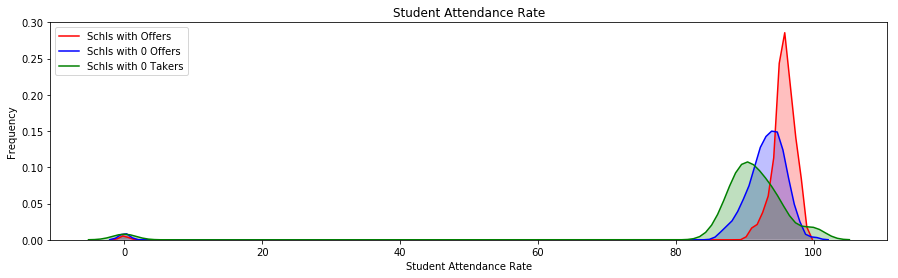

In [38]:
fig = plt.figure(figsize=(15,4))

ax=sb.kdeplot(gd_schl["Student Attendance Rate"] , color='r',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Student Attendance Rate"] , color='b',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Student Attendance Rate"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Student Attendance Rate')
plt.xlabel('Student Attendance Rate')
plt.ylabel('Frequency')

In [39]:
trace0 = go.Box(x=gd_schl["Percent of Students Chronically Absent"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Percent of Students Chronically Absent"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Percent of Students Chronically Absent"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Percent of Students Chronically Absent",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

As visualised, schools with offers and takers have significantly lower percentages of chronically absent students and higher mode attendance rate compared to schools with neither.

**Comparison of teaching practices**
Now that we've picked all the bones (exam scores/attendance rates)  we can for the students, time to shift our attention to the other half of the equation - the educators.

In [40]:
trace0 = go.Box(x=gd_schl["Collaborative Teachers %"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Collaborative Teachers %"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Collaborative Teachers %"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Collaborative Teachers  of  schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0,0.5,'Frequency')

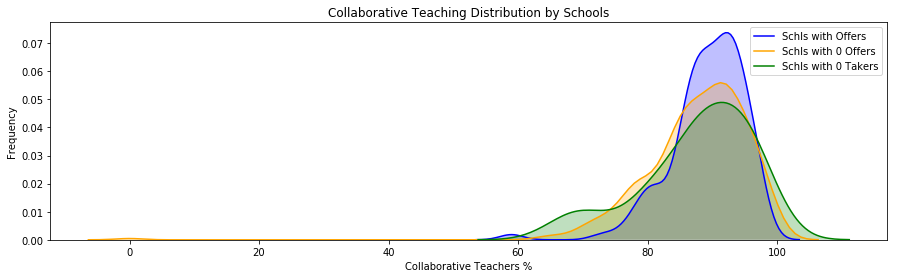

In [41]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Collaborative Teachers %"] , color='b',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Collaborative Teachers %"] , color='orange',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Collaborative Teachers %"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Collaborative Teaching Distribution by Schools')
plt.xlabel('Collaborative Teachers %')
plt.ylabel('Frequency')

Though there is higher degree of variation for schools without takers/offers, the majority of the schools falls within the same range in terms of collaborative teaching.

In [42]:
trace0 = go.Box(x=best["Collaborative Teachers %"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Collaborative Teachers %"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Collaborative Teachers %"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Collaborative Teachers %"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Collaborative Teachers % of Schls with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

No new findings from the 4 sub groups of schools with offers. Moving on to Supportive Environment.

In [43]:
trace0 = go.Box(x=gd_schl["Supportive Environment %"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Supportive Environment %"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Supportive Environment %"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Supportive Environment  of  schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0,0.5,'Frequency')

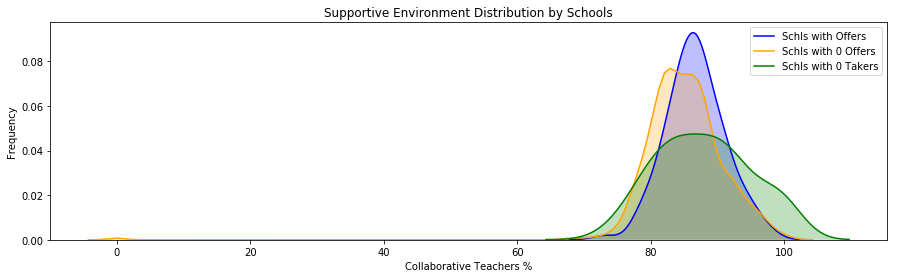

In [44]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Supportive Environment %"] , color='b',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Supportive Environment %"] , color='orange',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Supportive Environment %"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Supportive Environment Distribution by Schools')
plt.xlabel('Collaborative Teachers %')
plt.ylabel('Frequency')

Same obeservation as collaborative teaching, except this time it is the schools without offers and takers that has a slightly higher average.

In [45]:
trace0 = go.Box(x=best["Supportive Environment %"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Supportive Environment %"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Supportive Environment %"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Supportive Environment %"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Supportive Environment % of Schls with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

It seems however that Supportive Environment is that which differentiates the cream of the crop from the rest of the offer receiving schools, as visualised by the sudden jump in schools with more than 50% SHSAT offer rate.

In [46]:
trace0 = go.Box(x=gd_schl["Effective School Leadership %"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Effective School Leadership %"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Effective School Leadership %"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Effective School Leadership of schools",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0,0.5,'Frequency')

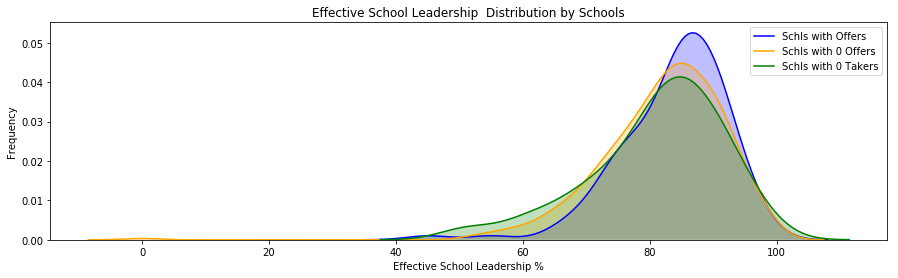

In [47]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Effective School Leadership %"] , color='b',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Effective School Leadership %"] , color='orange',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Effective School Leadership %"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Effective School Leadership  Distribution by Schools')
plt.xlabel('Effective School Leadership %')
plt.ylabel('Frequency')

In [48]:
trace0 = go.Box(x=best["Effective School Leadership %"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Effective School Leadership %"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Effective School Leadership %"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Effective School Leadership %"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Effective School Leadership of Schools with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

Effective leadership seems to be pretty constant across board.

In [49]:
trace0 = go.Box(x=gd_schl["Strong Family-Community Ties %"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Strong Family-Community Ties %"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Strong Family-Community Ties %"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Strong Family-Community Ties",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0,0.5,'Frequency')

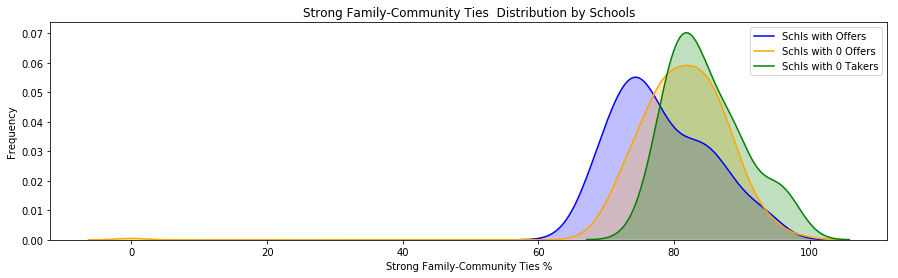

In [50]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Strong Family-Community Ties %"] , color='b',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Strong Family-Community Ties %"] , color='orange',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Strong Family-Community Ties %"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Strong Family-Community Ties  Distribution by Schools')
plt.xlabel('Strong Family-Community Ties %')
plt.ylabel('Frequency')

Surprisingly, it is the schools with 0 takers that scores the highest whereas it is the best performers of SHSAT that are lagging behind. 

In [51]:
trace0 = go.Box(x=best["Strong Family-Community Ties %"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Strong Family-Community Ties %"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Strong Family-Community Ties %"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Strong Family-Community Ties %"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Strong Family-Community Ties in Schls with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

It is interesting to note that family-community ties strengthens as percentage of offers received increases until it is over 50%.

In [52]:
trace0 = go.Box(x=gd_schl["Trust %"],name="Schls with Offers",boxmean=True)
trace1 = go.Box(x=ok_schl["Trust %"],name="Schls with 0 Offers",boxmean=True)
trace2 = go.Box(x=wk_schl["Trust %"],name="Schls with 0 Takers",boxmean=True)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Box Plot of Trust %",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0,0.5,'Frequency')

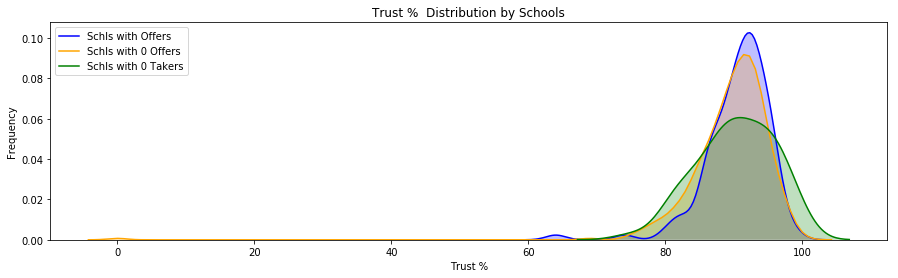

In [53]:
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(gd_schl["Trust %"] , color='b',shade=True, label='Schls with Offers')
ax=sb.kdeplot(ok_schl["Trust %"] , color='orange',shade=True, label='Schls with 0 Offers')
ax=sb.kdeplot(wk_schl["Trust %"] , color='g',shade=True, label='Schls with 0 Takers')
plt.title('Trust %  Distribution by Schools')
plt.xlabel('Trust %')
plt.ylabel('Frequency')

While there is more variance for the schools without SHSAT takers/offers, the majority of the schools are about the same standard in this area.

In [54]:
trace0 = go.Box(x=best["Trust %"],name="more than 50%",boxmean=True)
trace1 = go.Box(x=avgbest["Trust %"],name="20 ~ 49%",boxmean=True)
trace2 = go.Box(x=lowbest["Trust %"],name="10 ~ 19%",boxmean=True)
trace3 = go.Box(x=shitbest["Trust %"],name="less than 10%",boxmean=True)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Box Plot of Trust of Schls with Offers",
    margin = go.Margin(l=115)
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In summary, most of the teaching qualities of schools from each category are similar, with the only exception being strong family-community ties. It is also observed that increasing the level of Supportive Environment and Family-Community Ties for schools with SHSAT offers corresponds to increase in percentage of offers received.

**In Summary:**

1.Schools with low ENI do better in SHSAT

2.Schools in areas with lower crime rate do better

3.ENI may be more pertinent than crime rate with regards to SHSAT performance prediction

4.Schools which performs better in SHSAT also have better ELA/Math proficiency

4.Higher attendance and lower chornic absenteeism corresponds to better performance

5.Most schools have similar quality of teaching in terms of the areas provided

6.Increasing the level of Supportive Environment and Family-Community Ties for schools with SHSAT offers corresponds to increase in percentage of offers received

7.Schools that perform poorly in SHSAT tend to have >90% black/hispanic demographic

8.The better a school performs in SHSAT, the lesser the percentage of black/hispanic students

9.Black/Hispanic students under-performs severely in Math proficicency compared to their peers across all grades





**Recommendations**

Before we jump into recommendations, let us refresh on our initial goals:
1. To increase the numbers of SHSHAT registration
2. To increase the number of offers received

for the historically under-represented so as to achieve more diversity.


** Rec 1 : Extra Classes at feeder schools targeted at Black/Hispanics**



In [55]:
rec1 = gd_schl.loc[gd_schl['Percent of eight grade students who received offer'] >= 20]
print(rec1.shape)


(27, 166)


In [56]:
rec1.head(27)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,District,Latitude,Longitude,Address (Full),City,...,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Borough,School Category,Number of students who took test,Number of students who received offer,Percent of eight grade students who received offer,Percentage of Black/Hispanic students
01M184,NaN,NaN,NaN,P.S. 184M SHUANG WEN,3.101000e+11,1.0,40.711437,-73.985486,"327 CHERRY ST-2ND FL NEW YORK, NY 10002",NEW YORK,...,0.0,0.0,2.0,21.0,Manhattan,Public School 184,67.0,23.0,26.0,17.0
01M539,NaN,NaN,NaN,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",3.101000e+11,1.0,40.719500,-73.979239,"111 COLUMBIA ST NEW YORK, NY 10002",NEW YORK,...,0.0,0.0,0.0,0.0,Manhattan,NaN,126.0,91.0,67.0,19.0
02M114,NaN,NaN,NaN,EAST SIDE MIDDLE SCHOOL,3.102000e+11,2.0,40.780646,-73.947544,"331 E 91ST ST NEW YORK, NY 10028",NEW YORK,...,57.0,0.0,0.0,11.0,Manhattan,NaN,124.0,75.0,49.0,12.0
02M255,NaN,NaN,NaN,M.S. 255 SALK SCHOOL OF SCIENCE,3.102000e+11,2.0,40.735118,-73.981697,"319 E 19TH ST NEW YORK, NY 10003",NEW YORK,...,17.0,0.0,0.0,5.0,Manhattan,Middle School 255,108.0,70.0,55.0,13.0
02M276,NaN,NaN,NaN,BATTERY PARK CITY SCHOOL,3.102000e+11,2.0,40.706563,-74.017528,"55 BATTERY PL NEW YORK, NY 10011",NEW YORK,...,1.0,0.0,0.0,1.0,Manhattan,NaN,56.0,22.0,26.0,17.0
02M312,NaN,NaN,NaN,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,3.102000e+11,2.0,40.742571,-74.002371,"333 W 17TH ST NEW YORK, NY 10011",NEW YORK,...,3.0,0.0,0.0,1.0,Manhattan,NaN,163.0,113.0,62.0,8.0
03M054,NaN,NaN,NaN,J.H.S. 054 BOOKER T. WASHINGTON,3.103000e+11,3.0,40.800512,-73.962802,"103 W 107TH ST NEW YORK, NY 10025",NEW YORK,...,0.0,0.0,0.0,0.0,Manhattan,Junior High School 54,257.0,150.0,53.0,23.0
03M243,NaN,NaN,NaN,M.S. 243 CENTER SCHOOL,3.103000e+11,3.0,40.785101,-73.973867,"100 W 84TH ST-RM 310 NEW YORK, NY 10024",NEW YORK,...,0.0,0.0,0.0,0.0,Manhattan,Middle School 243,38.0,14.0,25.0,30.0
03M334,NaN,NaN,NaN,THE ANDERSON SCHOOL,3.103000e+11,3.0,40.781081,-73.978085,"100 W 77TH ST NEW YORK, NY 10024",NEW YORK,...,0.0,0.0,0.0,0.0,Manhattan,NaN,75.0,58.0,76.0,12.0
04M012,NaN,NaN,NaN,TAG YOUNG SCHOLARS,3.104000e+11,4.0,40.792590,-73.942119,"240 E 109TH ST NEW YORK, NY 10029",NEW YORK,...,0.0,0.0,0.0,0.0,Manhattan,NaN,54.0,27.0,48.0,36.0


This recommendation may not be helping those who *need* it the most, but it will help those who *deserve* it the most. The fact of the matter is, giving additional resources to an already tried and tested(in this case an at least 20% offer rate for SHSAT) feeder school has a much higher chance of success in increasing the number of Black/Hispanic students because the big road blocks such as absenteeism, crime rates and poverty are much less of an issue. This allows PASSYNC to focus on test prep and providing a more supportive environment, especially in those feeder schools where Black/Hispanic students are in such few numbers (ie the top feeder schools with >15% black/hispanic population)where stronger community ties and supportive learning environments are all the more necessary.

**Rec 2 : Early math skills cultivation for Black/Hispanic students in preschool**



In [57]:
trace = go.Scatter(
    x = Asian_math_2015['Grade'],
    y = Asian_math_2015['Mean Scale Score'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = Hispanic_math_2015['Grade'],
    y = Hispanic_math_2015['Mean Scale Score'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = Black_math_2015['Grade'],
    y = Black_math_2015['Mean Scale Score'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = White_math_2015['Grade'],
    y = White_math_2015['Mean Scale Score'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student Math Performance By Grade (Race) 2015',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='Mean Scale Score'
    )
)

data = [trace, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

What we should understand from this visual is not just that Black/Hispanic students are far behind Asian/White students, but rather that by 3rd grade it's already too late to play catch up. In fact, research has shown that Math skills at school entry predicted math skills in 3rd grade (cit 1) and is paramount to academic achievement later on(cit 2). Creating a preschool programme that adequatley prepares Black/Hispanic children for future rigor is the only way we can even attempt bridge this gap, that is to try to prevent it from occurring in the first place.  As demostrated earlier, incresed levels of Math proficiency is correlated to highger percentage of SHSAT offer/taker rate. This, however, is a long term solution that will take years before its effects are translated into actual SHSAT statistics, although in this case the evaluation of the effectiveness of such a program should be done using the grade 3 math exam scores instead.

Citations:

1.  http://www.californiakindergartenassociation.org/wp-content/uploads/2012/10/Article-by-Deborah-Stipek-Math-Matters-Even-for-Little-Kids.pdf 
2. http://earlymath.org/earlymath/wp-content/uploads/2014/09/Math-Matters-Report_2ndEd1.pdf

In [10]:
name = 'analysis-nyc-education-shshat'

In [11]:
!ipython nbconvert {name}.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook analysis-nyc-education-shshat.ipynb to html
[NbConvertApp] Writing 1689947 bytes to analysis-nyc-education-shshat.html


In [12]:
display(HTML("<a href='{name}.html' target='_blank'> {name}.html </a>".format(name=name)))